<a href="https://colab.research.google.com/github/jayeshraj619/AI-LAB/blob/master/mini%20project(LSTM).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/content/DATA1.csv',index_col='DATE',parse_dates=True)
df.index.freq='MS'

In [3]:

df.head()

,SPI
DATE,
Jan-50,-0.355490
Feb-50,-0.589456
Mar-50,-0.069685
Apr-50,-0.674490
May-50,-0.282216


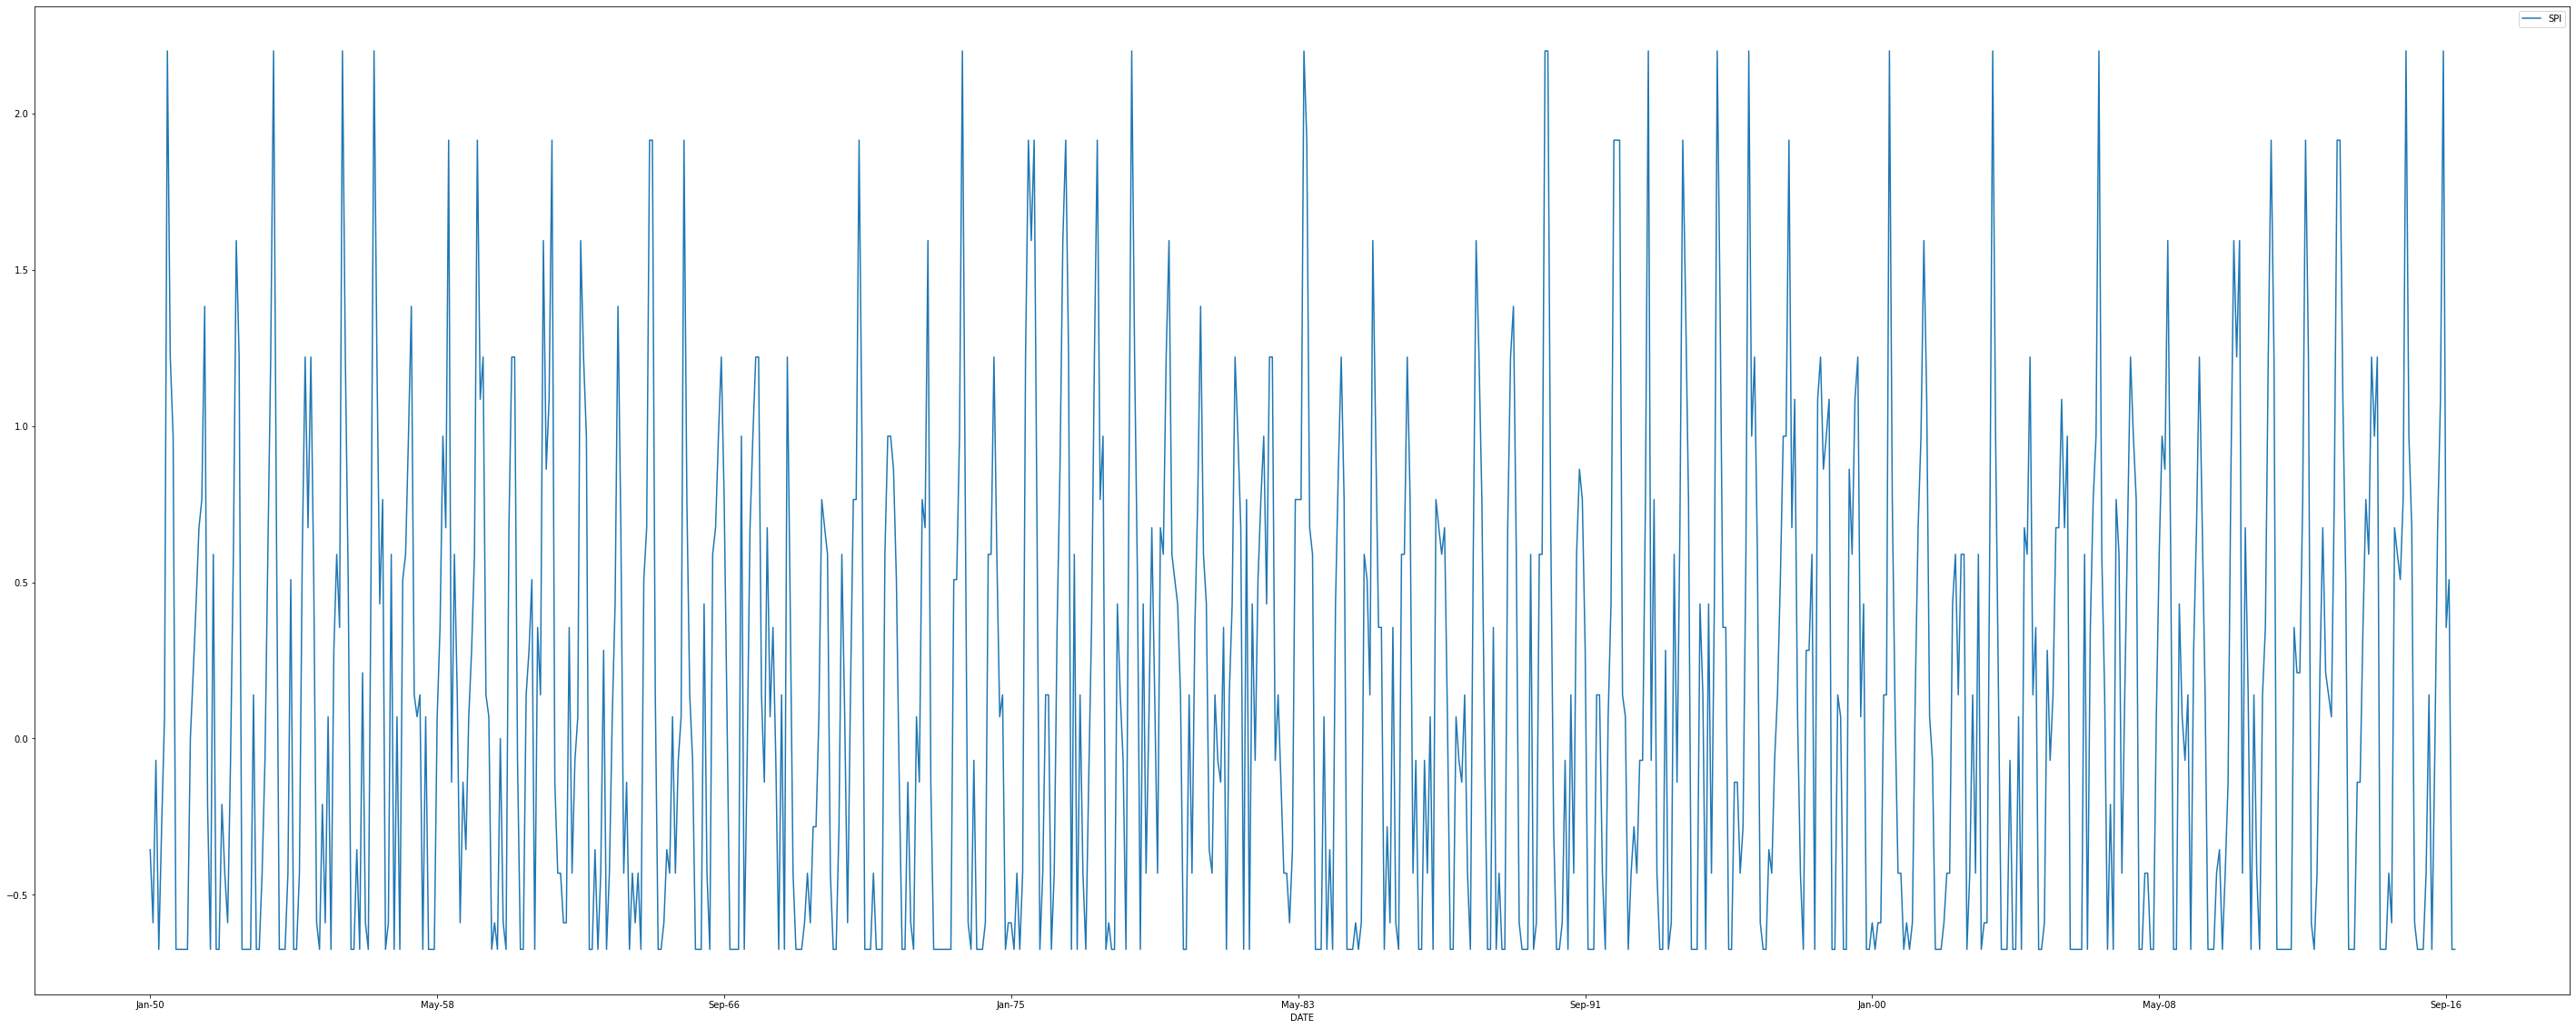

In [4]:
df.plot(figsize=(50,20))

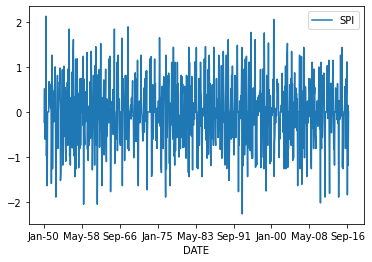

In [5]:
#structuring yt=yt-y(t-1)
df['SPI']=df['SPI']-df['SPI'].shift(1)
df.plot()


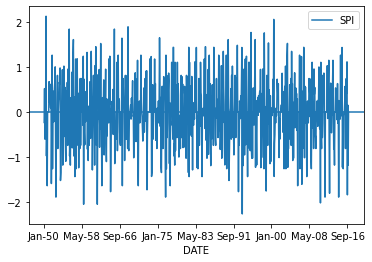

In [8]:
df.plot()
plt.axhline(df['SPI'].mean())
plt.show()

In [9]:
df['Jan-50':'Dec-16']


,SPI
DATE,
Jan-50,NaN
Feb-50,-0.233965
Mar-50,0.519771
Apr-50,-0.604805
May-50,0.392274
...,...
Aug-16,1.114675
Sep-16,-1.844510
Oct-16,0.152998


In [ ]:
len(df)


804

In [13]:

train = df.iloc[1:603]
test = df.iloc[603:]

In [14]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [15]:
scaler.fit(train)
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

In [16]:
scaled_train[1:10]

array([[0.63396723],
       [0.37838184],
       [0.60499057],
       [0.595815  ],
       [1.        ],
       [0.29325574],
       [0.45828776],
       [0.14267582],
       [0.51583748]])

In [17]:
from keras.preprocessing.sequence import TimeseriesGenerator

In [19]:
# define generator
n_input = 3
n_features = 1
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)

In [20]:
X,y = generator[0]
print(f'Given the Array: \n{X.flatten()}')
print(f'Predict this y: \n {y}')

Given the Array: 
[0.46266353 0.63396723 0.37838184]
Predict this y: 
 [[0.60499057]]


In [21]:
X.shape

(1, 3, 1)

In [22]:
# We do the same thing, but now instead for 12 months
n_input = 12
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)

In [23]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [24]:
# define model
model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(n_input, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100)               40800     
_________________________________________________________________
dense (Dense)                (None, 1)                 101       
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________


In [26]:
# fit model
model.fit(generator,epochs=100)

Epoch 1/100
590/590 [==============================] - 5s 6ms/step - loss: 0.0455
Epoch 2/100
590/590 [==============================] - 3s 6ms/step - loss: 0.0313
Epoch 3/100
590/590 [==============================] - 4s 6ms/step - loss: 0.0304
Epoch 4/100
590/590 [==============================] - 3s 6ms/step - loss: 0.0279
Epoch 5/100
590/590 [==============================] - 3s 6ms/step - loss: 0.0263
Epoch 6/100
590/590 [==============================] - 4s 6ms/step - loss: 0.0263
Epoch 7/100
590/590 [==============================] - 4s 6ms/step - loss: 0.0264
Epoch 8/100
590/590 [==============================] - 4s 6ms/step - loss: 0.0254
Epoch 9/100
590/590 [==============================] - 4s 6ms/step - loss: 0.0248
Epoch 10/100
590/590 [==============================] - 4s 6ms/step - loss: 0.0247
Epoch 11/100
590/590 [==============================] - 4s 6ms/step - loss: 0.0242
Epoch 12/100
590/590 [==============================] - 3s 6ms/step - loss: 0.0248
Epoch 13/100


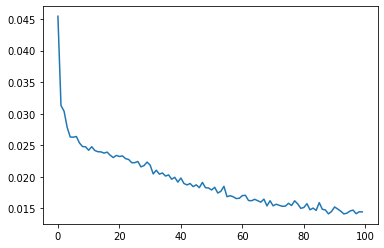

In [27]:
loss_per_epoch = model.history.history['loss']
plt.plot(range(len(loss_per_epoch)),loss_per_epoch)

In [28]:
last_train_batch = scaled_train[-12:]

In [29]:
last_train_batch = last_train_batch.reshape((1, n_input, n_features))

In [30]:
model.predict(last_train_batch)


array([[0.56866324]], dtype=float32)

In [31]:
scaled_test[0]

array([0.51583748])

In [32]:
test_predictions = []

first_eval_batch = scaled_train[-n_input:]
current_batch = first_eval_batch.reshape((1, n_input, n_features))

for i in range(len(test)):
    
    # get the prediction value for the first batch
    current_pred = model.predict(current_batch)[0]
    
    # append the prediction into the array
    test_predictions.append(current_pred) 
    
    # use the prediction to update the batch and remove the first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)


In [33]:
test_predictions

[array([0.56866324], dtype=float32),
 array([0.6003485], dtype=float32),
 array([0.6064302], dtype=float32),
 array([0.58746314], dtype=float32),
 array([0.5723485], dtype=float32),
 array([0.35719407], dtype=float32),
 array([0.35522184], dtype=float32),
 array([0.4928773], dtype=float32),
 array([0.5014363], dtype=float32),
 array([0.5085988], dtype=float32),
 array([0.53575325], dtype=float32),
 array([0.52762353], dtype=float32),
 array([0.52114534], dtype=float32),
 array([0.58092177], dtype=float32),
 array([0.63154745], dtype=float32),
 array([0.63153625], dtype=float32),
 array([0.50632995], dtype=float32),
 array([0.3063984], dtype=float32),
 array([0.38553402], dtype=float32),
 array([0.4841874], dtype=float32),
 array([0.51302946], dtype=float32),
 array([0.5157182], dtype=float32),
 array([0.5304141], dtype=float32),
 array([0.52966887], dtype=float32),
 array([0.533597], dtype=float32),
 array([0.6104951], dtype=float32),
 array([0.63168246], dtype=float32),
 array([0.6338

In [34]:
test.head()

,SPI
DATE,
Apr-00,0.000000
May-00,0.729166
Jun-00,0.000000
Jul-00,2.060290
Aug-00,-1.435290


In [35]:
true_predictions = scaler.inverse_transform(test_predictions)

In [36]:
test['Predictions'] = true_predictions

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


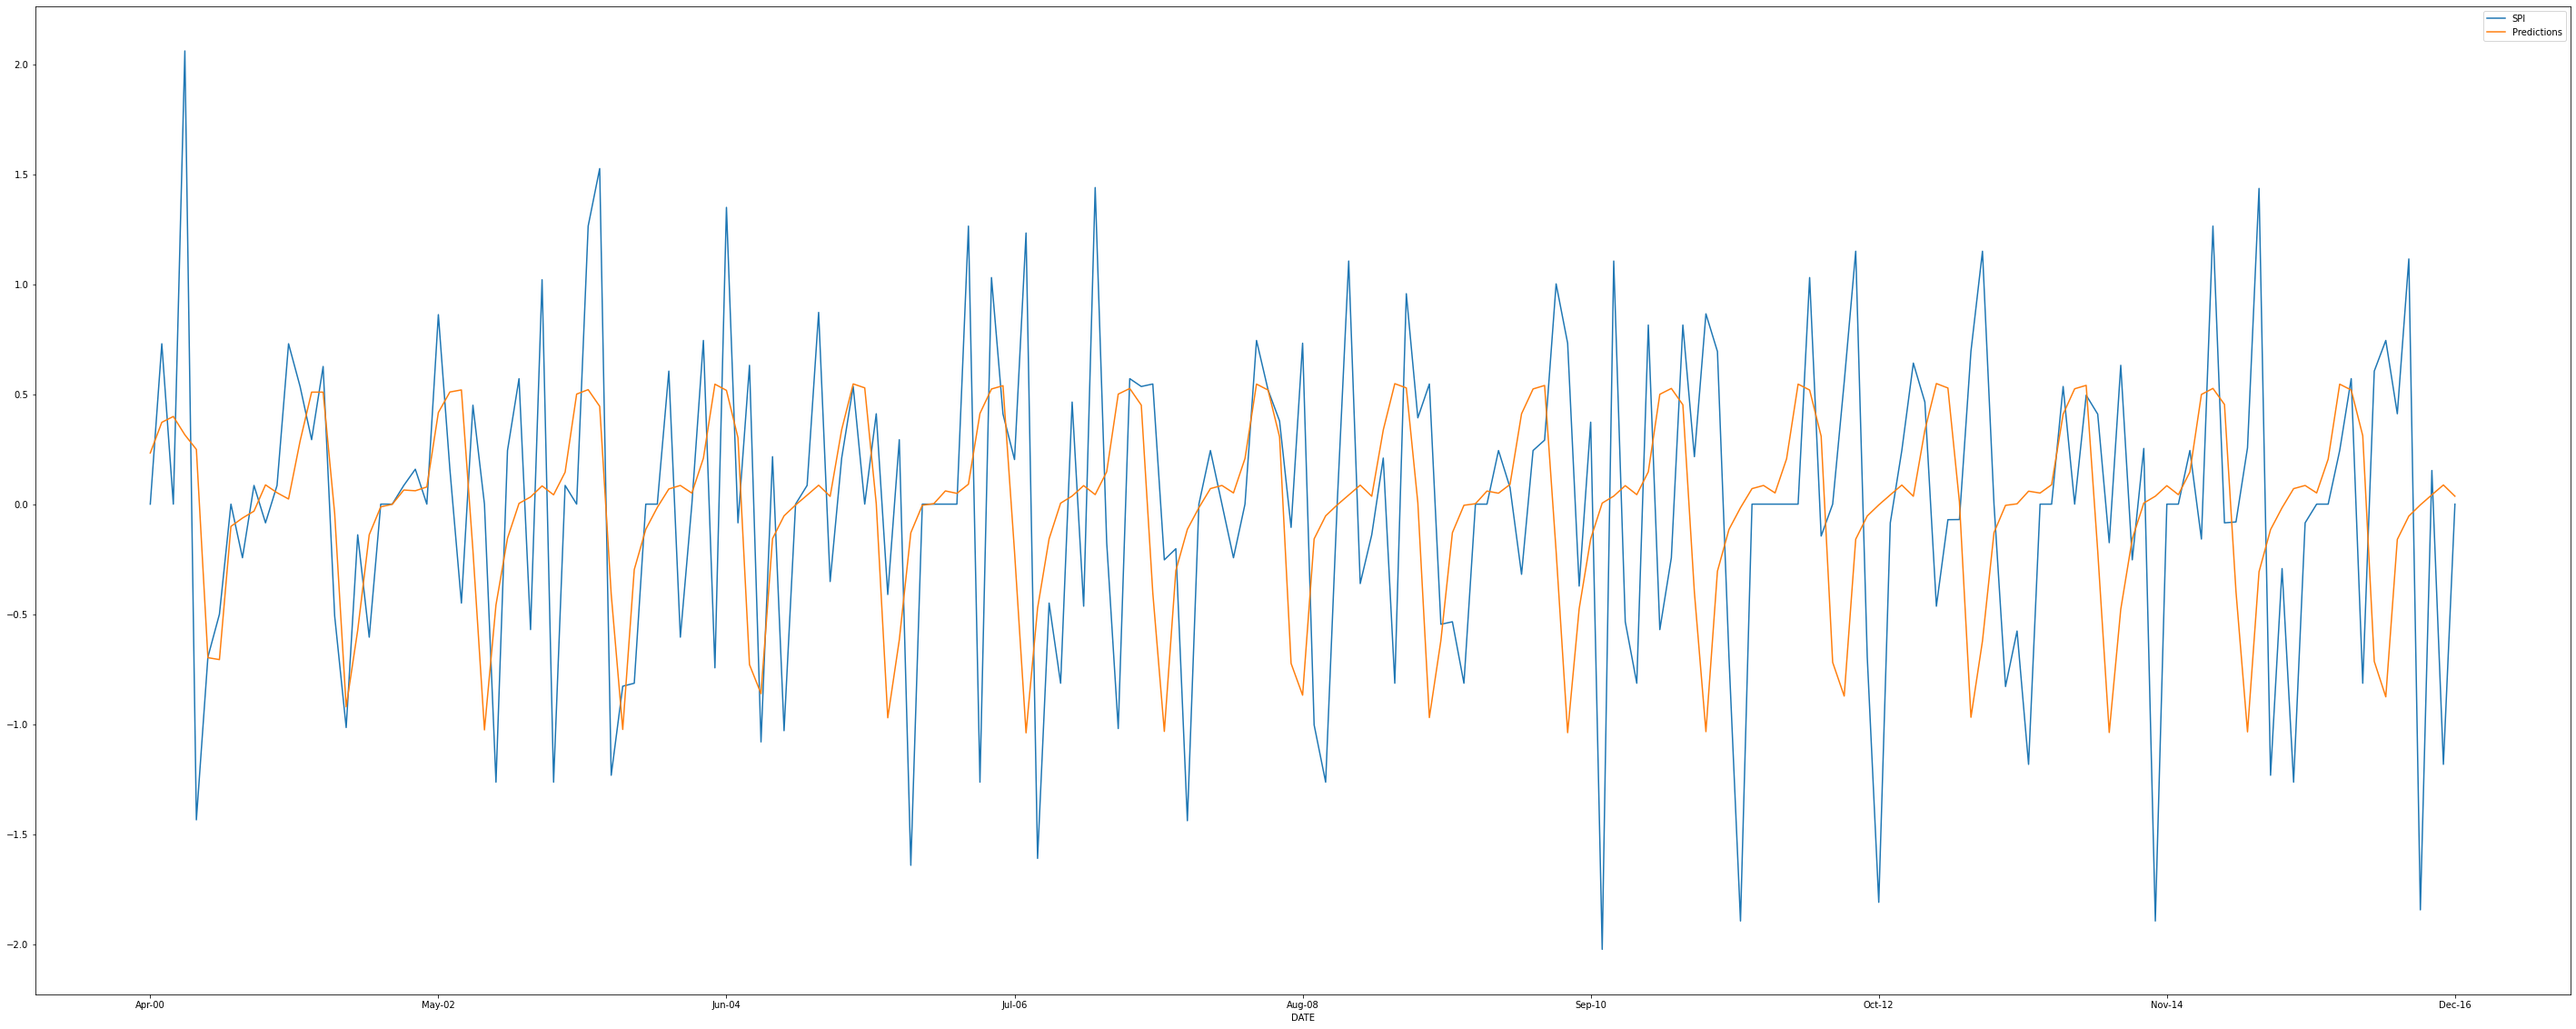

In [37]:
test.plot(figsize=(50,20))

In [38]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse=sqrt(mean_squared_error(test['SPI'],test['Predictions']))
print(rmse)

0.8073778978017414
